<a href="https://colab.research.google.com/github/GeorgeThan414/Machine_Learning_CSD/blob/main/Ergasia2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 2 - Decision Trees $ Random Forests**

Import all the libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_text
from sklearn.metrics import accuracy_score
from itertools import product
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

**Task 1**

Load the dataset using pandas library. First of all import the necessary csv,datasets into the files. Then read them through pandas.

In [ ]:
df=pd.read_csv('water_potability.csv')
print(df.head())
df.describe()

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Plot the histograms of each variable and the bar plot for the Potability feature.


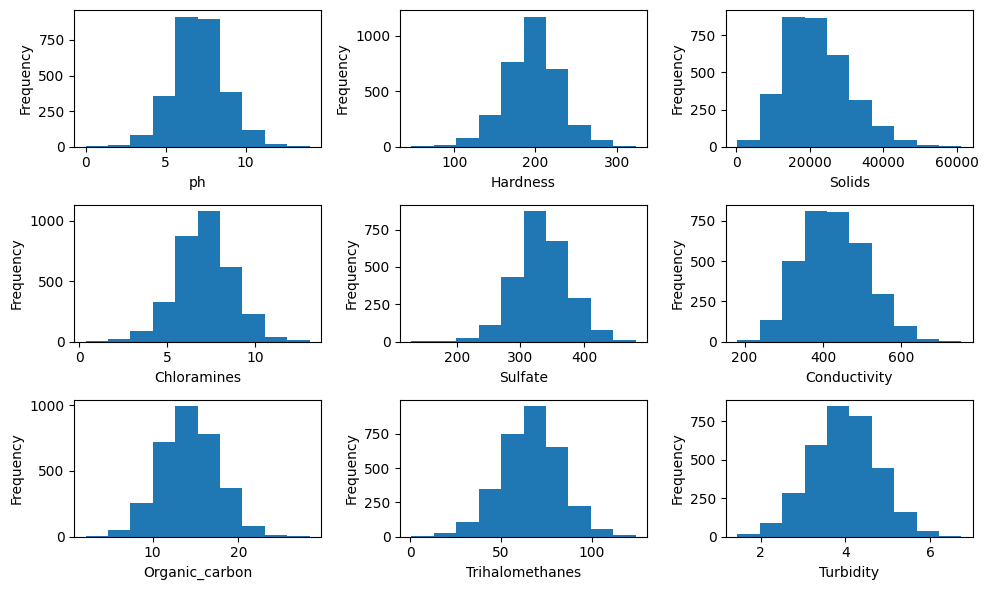

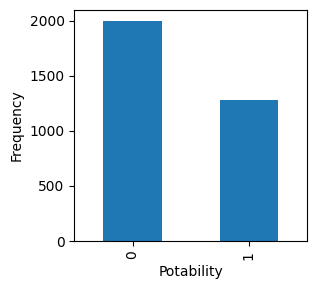


Potability
0    1998
1    1278
Name: count, dtype: int64


In [ ]:
# Histogram of 9 features
plt.figure(figsize=(10,6))
for index in range(9):
  plt.subplot(3,3,index+1)
  plt.hist(df.iloc[:,index])
  plt.xlabel(df.columns[index])
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Barplot for the last feature, Potability feature
plt.figure(figsize=(3,3))
df['Potability'].value_counts().plot(kind='bar')
plt.xlabel('Potability')
plt.ylabel('Frequency')
plt.show()

print("")
#Print the total values from Potability that belongs to class 0 and class1
print(df['Potability'].value_counts())

Find the **NaN values** for each feature in the dataset.

The matrix below depicts that several features have missing values, specifically the **Trihalomethanes missing 162 values, the Sulface 781 values and lastly the ph 491 values**, which indicates a lack of reliable and qualitative measurements for each sample in the dataset. In addition, the Potability feature has **1998 values, which is the 61.5% of the total samples in class 0** and only **1278 the remaining 38.5% samples in class 1**. This difference makes the dataset imbalanced by introducing bias in the allocation of samples. Therefore, the quality of the dataset is not sufficient to be applied for real-time applications.



In [ ]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


**Task 2**
Calculation of percentages of drinkable and non-drinkable water based on ph.

In [ ]:
# Calculate the percentage of the potable and non-potable water with ph < 6.5

#Create a new dataframe based on ph < 6.5
df1= df[df['ph']<6.5]
print(df1.head())
print("")
print(f"The length of the df1 dataframe is: {len(df1)}")
#Count the values of the Potability
print("")
print(df1['Potability'].value_counts())
print("")

print("Print the next dataframe")
print("")
# 6.5 < ph <8.5
df2 = df[df['ph']< 8.5]
df2 = df2[df2['ph']>6.5]
print(df2.head())
print("")
print(f"The length of the df2 dataframe is: {len(df2)}")
print("")
print(df2['Potability'].value_counts())

# ph< 8.5
print("")
print("Print the next dataframe")
print("")
df3 = df[df['ph']< 8.5]
print(df3.head())
print("")
print(f"The length of the df3 dataframe is: {len(df3)}")
print("")
print(df3['Potability'].value_counts())

          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
15  6.347272  186.732881  41065.234765     9.629596  364.487687    516.743282   
23  3.902476  196.903247  21167.500099     6.996312         NaN    444.478883   
24  5.400302  140.739062  17266.593422    10.056852  328.358241    472.874073   

    Organic_carbon  Trihalomethanes  Turbidity  Potability  
1        15.180013        56.329076   4.500656           0  
5         8.399735        54.917862   2.559708           0  
15       11.539781        75.071617   4.376348           0  
23       16.609033        90.181676   4.528523           0  
24       11.256381        56.931906   4.824786           0  

The length of the df1 dataframe is: 968

Potability
0    612
1    356
Name: count, dtype: int64

Print the next dataframe

          ph    Hardnes

**Task 2 answer**

Based on the **World Health Organization** intructions, the potable water must have 6.5 < ph < 8.5. According to this dataset, **the potable water samples that have ph < 6.5 were found potable(potability=1) in 36% of the cases**, while samples with **6.5 < ph < 8.5 were found potable(potability=1) in 44% of thecases**. **Last but not least, the samples with ph > 8.5, found potable around 40.8%**. This is really concerning regarding the reliability of the data-samples, as they do not follow the instructions of the WHO, whch can lead to harmfull and misleading conclusions.

**Task 3**

The plots below shows, **that there is no clear separation between the two classes**, which is confusing not only for the reviewer, but also for the analyst, at it difficult to identify which samples are potable and which are not. Moreover, the WHO defines a threshold that chloramine must be below 4 for potable water, which is the opposite according to the plot below, that a lot of potable samples have cloramine >4.

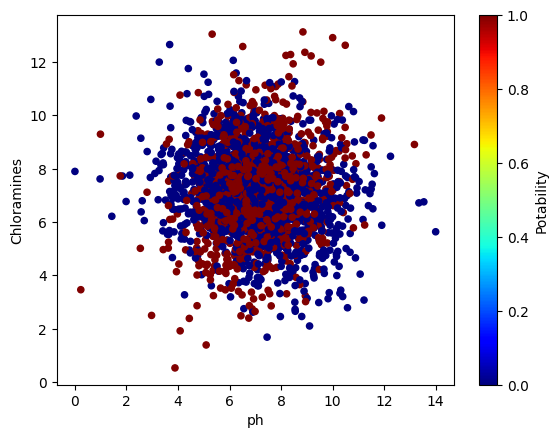

In [ ]:
# Create a scatter plot between the Ph and Chloramine.
# Also separate the potable with the non-potable samples with different colour.
df.plot(kind='scatter', x='ph', y='Chloramines', c='Potability', cmap=plt.get_cmap('jet'))
plt.show()


**Task 4**

In [ ]:
# Fill the NaN values of the dataset.
# There are several methods to fill the samples, like linear interpolation between the values, fill them with zeros, ones or the mean and etc.
# Fill the missing values using the mean of the specified feature.

# The features thave have missing values have been reported earlier are the, ph, Sulfate and Trihalomethanes
#Initialize the imputer to replace the NaN with values.
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
print(df_imputed.head())
print("")
print(df_imputed.isna().sum())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135         0.0  
1       15.180013        56.329076   4.500656         0.0  
2       16.868637        66.420093   3.055934         0.0  
3       18.436524       100.341674   4.628771         0.0  
4       11.558279        31.997993   4.075075         0.0  

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalometh

**Task 5**

In [ ]:
# Convert the df4 dataframe to numpy arrays
# Split the numpy arrays to train/test 70/30

# Convert the above dataframe objects to numpy arrays, using the .values property
X= df_imputed.drop('Potability', axis=1).values
y= df_imputed['Potability'].values

# Split the to 70/30 with seed=0.
seed=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

print(f"The length of the X_train is: {len(X_train)}")
print(f"The length of the X_test is: {len(X_test)}")
print(  f"The length of the y_train is: {len(y_train)}")
print(f"The length of the y_test is: {len(y_test)}")

The length of the X_train is: 2293
The length of the X_test is: 983
The length of the y_train is: 2293
The length of the y_test is: 983


**Task 6**

1) Fit the classifier to the data,
2) Measure the accuracy in both training and testing data.
3) The below results are achieved, without any normalization in the data.

In [ ]:
# Train the DecisionTreeClassifier from sklearn

# Define the model
seed=0
classifier = DecisionTreeClassifier(random_state=seed)
# Fit the classifier to data
classifier.fit(X_train, y_train)

# Predict the accuracy in the Train set
y_pred_train = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Predict the accuracy in the Test set
y_pred_test = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"The train accuracy is: {train_accuracy*100:.2f}%")
print(f"The test accuracy is: {test_accuracy*100:.2f}%")

The train accuracy is: 100.00%
The test accuracy is: 57.48%


**Task 7**

Repeat the previous task with **gini, entropy, max_depth, min-samples-split, min-samples-leaf, max-features and cost-complexity-pruning.**

In [ ]:
# Collect all the results in the dataframe
# Define the Hyperparameters for the experiment
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_splits = [2, 5]
min_leaves = [1, 2]
max_feats = [None, 'sqrt']
ccp_alphas = [0.0, 0.01]

# Store the list
results= []

# Test all the possible combinations of hyperparameters using the product
for criterion, depth, minsplit, minleaf, maxfeat, alpha in product(
    criteria, max_depths, min_splits, min_leaves, max_feats, ccp_alphas):

  #Initialize and apply the classifier
  classifier1= DecisionTreeClassifier(
      criterion=criterion,
      max_depth=depth,
      min_samples_split=minsplit,
      min_samples_leaf=minleaf,
      max_features=maxfeat
  )

  #Fit the classifer
  classifier1.fit(X_train, y_train)

  #Predict the accuracy in the Train set
  y_pred_train = classifier1.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_pred_train)

  #Predict the accuracy in the Test set
  y_pred_test = classifier1.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_pred_test)

  results.append([criterion, depth, minsplit, minleaf, maxfeat, alpha, train_accuracy, test_accuracy])

#Transform the results to DataFrame
df_results= pd.DataFrame(results)
df_results.columns=['Criterion', 'Max Depth', 'Min Samples Split', 'Min Samples Leaf', 'Max Features', 'CCP Alpha', 'Train Accuracy', 'Test Accuracy']
print(df_results.head())





  Criterion  Max Depth  Min Samples Split  Min Samples Leaf Max Features  \
0      gini        NaN                  2                 1         None   
1      gini        NaN                  2                 1         None   
2      gini        NaN                  2                 1         sqrt   
3      gini        NaN                  2                 1         sqrt   
4      gini        NaN                  2                 2         None   

   CCP Alpha  Train Accuracy  Test Accuracy  
0       0.00        1.000000       0.573754  
1       0.01        1.000000       0.570702  
2       0.00        1.000000       0.572737  
3       0.01        1.000000       0.607325  
4       0.00        0.952028       0.577823  


**Task 8**

In [ ]:
# Find the classifier with the best performance on the test set with max_depth=3
best_accuracy_df = df_results[df_results["Max Depth"]==3]
best_row = best_accuracy_df.loc[best_accuracy_df["Test Accuracy"].idxmax()]
print(best_row)
# Get the maximum Test Accuracy among them
best_accuracy = best_accuracy_df["Test Accuracy"].max()
print("Best Test Accuracy with Max Depth = 3:", best_accuracy)

Criterion             entropy
Max Depth                 3.0
Min Samples Split           2
Min Samples Leaf            1
Max Features             None
CCP Alpha                 0.0
Train Accuracy       0.641082
Test Accuracy        0.639878
Name: 64, dtype: object
Best Test Accuracy with Max Depth = 3: 0.6398779247202442


The tree splits the dataset into smaller subsets, with final goal to classify the sample as potable or non-potable. Taking into consideration the best hyperparameters from the previous analysis, the visualization of the tree consists of one root node and 6 decision nodes and 8 leaf nodes. The final answer was that only 120 samples were classified as potable, and the rest as non-potable. Each decision node takes a feature and split further the data into smaller subset, in order to classify all the samples.

Test Accuracy: 0.6398779247202442



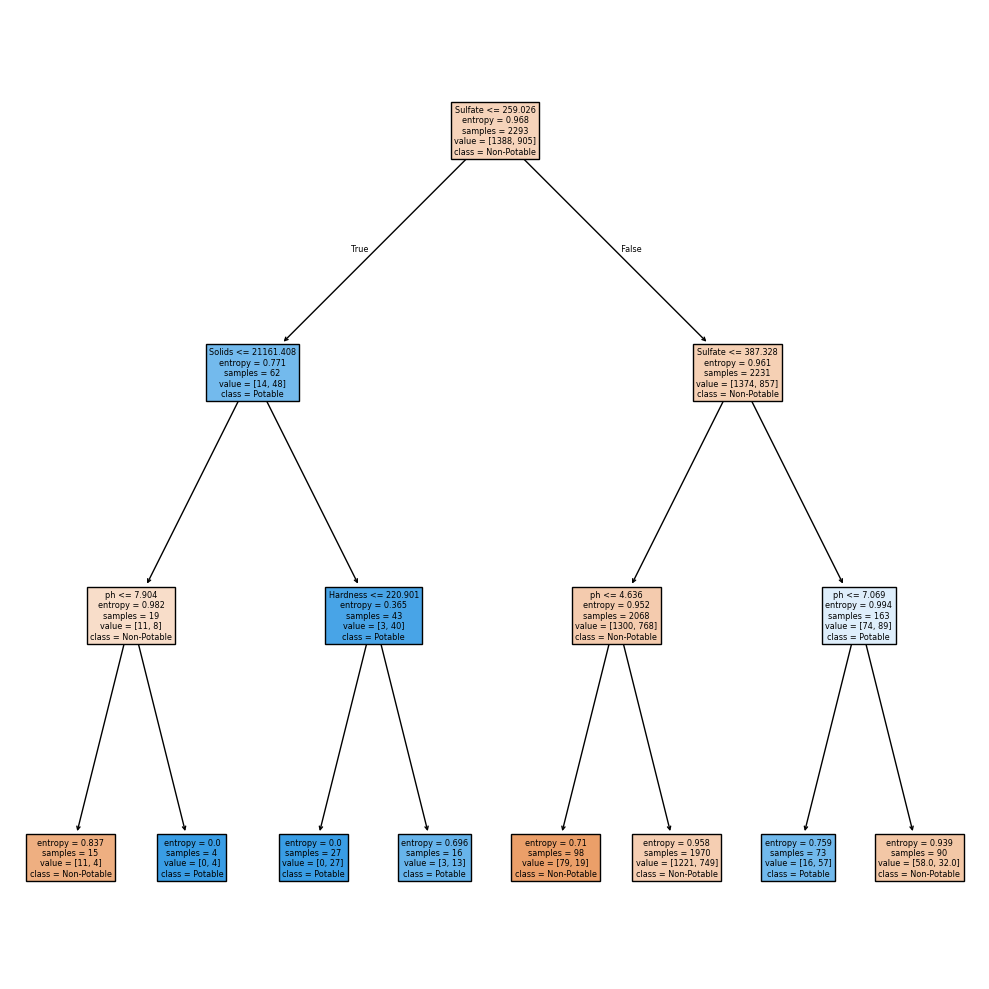

In [ ]:
# Train again the tree and plot it's structure
# The best hyperparameters :
  #Max_depth=3
  #Min Samples Split=2
  #Min Samples Leaf=2
  #Max Features=None
  #CCP Alpha=0.01

seed=0
best_classifier= DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    ccp_alpha=0.00,
    random_state=seed)

#Fit the classifier
best_classifier.fit(X_train, y_train)

# Predict the X_test
y_pred_test = best_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)
print("")
# Visualize the tree
plt.figure(figsize=(10,10))
plot_tree(best_classifier, feature_names=df_imputed.columns, class_names=['Non-Potable', 'Potable'], filled=True)
plt.tight_layout()
plt.show()

**Task 9**


The most important features from the Decision Tree are the :
 1) Sulfate,
 2) ph,
 3) Solids ,
 4) Hardness,

 Ok if the analysis could be repeated 5 times, the most important features will be the majority of the features in all 5 tests. In this case the hyperparameter were optimal and the dicision tree outputs those as most important features. Overall, the feature which will appear the most times in the analysis will be the most important feature.

Test Accuracy: 0.6398779247202442



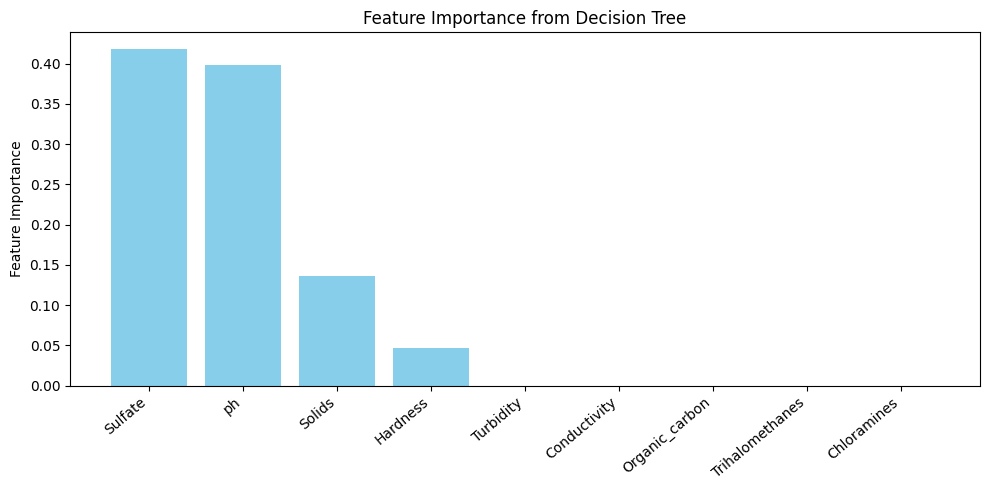

In [ ]:
# Retrain the model
seed=0
Best_classifier= DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    ccp_alpha=0.00,
    random_state=seed)


#Fit the classifier
Best_classifier.fit(X_train, y_train)

# Predict the X_test
y_pred_test = Best_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)
print("")

# Collect the features
importances = Best_classifier.feature_importances_
# Drop the target column from the dataframe
features = df_imputed.drop('Potability', axis=1).columns

# Sort the features by importance
idx = np.argsort(importances)[::-1]
# sorted_feats and sotrted_imps will be the axes in the bar plot
sorted_feats = features[idx]
sorted_imps = importances[idx]

plt.figure(figsize=(10,5))
plt.bar(range(len(sorted_feats)), sorted_imps, color="skyblue")
plt.xticks(range(len(sorted_feats)), sorted_feats, rotation=40, ha="right")
plt.ylabel("Feature Importance")
plt.title("Feature Importance from Decision Tree")
plt.tight_layout()
plt.show()

**Task 10**

Random forest in more superior algorithm that the Decision Tree, because for the final prediction it averages the outputs of all individual decision trees before make its decision. By using multiple trees trained on random subsets of data and features, the Random Forest usually avoids overfitting, a problem that a single Decision Tree often suffers from, since a single tree **tends to memorize all possible combinations and patterns** in the training data rather than generalize to new data. That's the main reasons that i believe the Random Forest is more powerful algorithm.


**Task 11**

In [ ]:
# Use the Random Forest on the data, with different estimators
seed=0
estimators= [50,100,200]

for n in estimators:
  model= RandomForestClassifier(random_state=seed, n_estimators=n)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_pred_train)
  y_pred_test = model.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_pred_test)
  print(f"The train accuracy for {n} estimators is: {train_accuracy*100:.2f}%")
  print(f"The test accuracy for {n} estimators is: {test_accuracy*100:.2f}%")



The train accuracy for 50 estimators is: 100.00%
The test accuracy for 50 estimators is: 69.38%
The train accuracy for 100 estimators is: 100.00%
The test accuracy for 100 estimators is: 69.79%
The train accuracy for 200 estimators is: 100.00%
The test accuracy for 200 estimators is: 68.97%


**Task 12**

The dataset has 2 classes[ 'Potable', 'Non-potable'], the model aims to classify the samples into these two classes, while avoiding overfitting. If the model classifies non-potable water as potable **(False Positive)** this is extremely dangerous and unsafe for humans, which can cause serious health risks. If the model classifies the potable water as non-potable **(False Negative)**, this classification is less harmful, than the previous case, since it just means that safe water is incorrectly rejected. Therefore, **the cost in these two scenarios (errors) are completely different**. Eventually, **it is preferable for the model to predict the non-potalbe water**, even if **it achieves smaller accuracy for potable water**.

**Task 13**

I believe that the safest choice for a company is the **Random Forest Algorithm**, because the results of this algorithm are **explainable, reliable and statistical robust**. Moreover, it reduces the likelihood of dangerous misclassifications and potential liability, due to the justified predictions of many independed trees which minimizes this error. In addition, the results of the **Random Forest are more stable and robust**, because it collects the majority of the votes from all the trees for the final decision, **which is consistent**.
